<a href="https://colab.research.google.com/github/janputra/Neural-Networks-Practice/blob/main/TF2_0_CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Dense, Flatten
from tensorflow.keras.models import Model

In [ ]:
cifar10= tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test)= cifar10.load_data()
x_train, x_test=x_train/255.0, x_test/255.0
y_train, y_test= y_train.flatten(), y_test.flatten()
print('x_train shape :', x_train.shape)
print('y_train shape :', y_train.shape)

x_train shape : (50000, 32, 32, 3)
y_train shape : (50000,)


In [ ]:
K= len(set(y_train))
print('Number of Class : ',K)

Number of Class :  10


In [ ]:
i=Input(shape=x_train[0].shape)
x= Conv2D(32,(3,3), padding='same',activation='relu')(i)
x= MaxPooling2D((2,2))(x)
x= Conv2D(64,(3,3), padding='same',activation='relu')(x)
x= MaxPooling2D((2,2))(x)
x= Conv2D(128,(3,3), padding='same',activation='relu')(x)
x= MaxPooling2D((2,2))(x)
x= Flatten()(x)
x=Dropout(0.2)(x)
x= Dense(1024,activation='relu')(x)
x=Dropout(0.2)(x)
x= Dense(512,activation='relu')(x)
x=Dropout(0.2)(x)
x=Dense(K, activation='softmax')(x)

model= Model(i,x)

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
r=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=15)

Epoch 1/15
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4383 - accuracy: 0.4750 - val_loss: 1.1241 - val_accuracy: 0.5959
Epoch 2/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0090 - accuracy: 0.6437 - val_loss: 0.9277 - val_accuracy: 0.6807
Epoch 3/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8398 - accuracy: 0.7052 - val_loss: 0.8363 - val_accuracy: 0.7054
Epoch 4/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7319 - accuracy: 0.7432 - val_loss: 0.7602 - val_accuracy: 0.7321
Epoch 5/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6386 - accuracy: 0.7751 - val_loss: 0.7114 - val_accuracy: 0.7538
Epoch 6/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5711 - accuracy: 0.7985 - val_loss: 0.7277 - val_accuracy: 0.7543
Epoch 7/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5022 - accuracy: 0.8229 - val_loss: 0.7105 - val_accuracy:

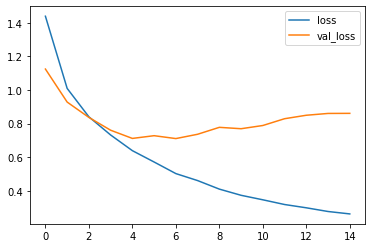

In [ ]:
hist =r.history

plt.plot(hist['loss'],label='loss')
plt.plot(hist['val_loss'],label='val_loss')
plt.legend()

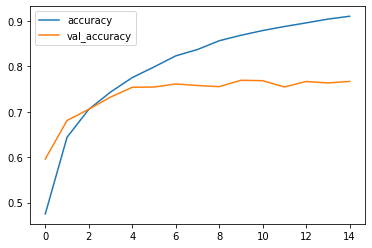

In [ ]:
plt.plot(hist['accuracy'],label='accuracy')
plt.plot(hist['val_accuracy'],label='val_accuracy')
plt.legend()

Confusion matrix, without normalization
[[771  12  63  20  24  16  10  10  54  20]
 [  8 878   7  12   5   4  10   3  24  49]
 [ 35   3 756  34  68  37  35  18  10   4]
 [ 17   7  90 557  56 153  68  26  15  11]
 [ 10   2 102  38 727  33  32  47   8   1]
 [ 10   2  60 152  38 670  30  32   3   3]
 [  2   2  67  45  36  25 809   2  11   1]
 [  9   0  54  38  48  43   9 787   6   6]
 [ 38  14  17   9   7   9   4   2 886  14]
 [ 23  61  10  11   7   8   7  13  34 826]]


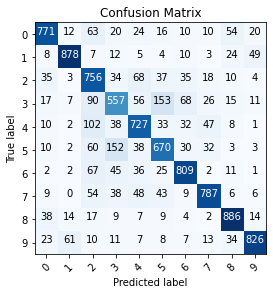

In [ ]:
#confussion matrix

from sklearn.metrics import confusion_matrix
import numpy as np
import itertools


def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):


  if normalize:
    cm= cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    print("Normalized confusion matrix")
  else:
    print('Confusion matrix, without normalization')

  print(cm)


  plt.imshow(cm, interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar
  tick_marks= np.arange(len(classes))

  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt ='.2f' if normalize else 'd'

  thresh = cm.max()/2


  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
      plt.text(j,i,format(cm[i,j],fmt),
               horizontalalignment='center',
               color='white' if cm[i,j]>thresh else 'black')
      
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

  plt.show()


p_test=model.predict(x_test).argmax(axis=1)
cm= confusion_matrix(y_test, p_test)

plot_confusion_matrix(cm,list(range(10)))

In [ ]:
# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

Text(0.5, 1.0, 'True label : truck Predicted : frog')

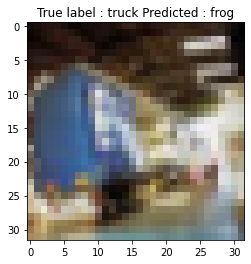

In [ ]:
#show misclassified examples

misclassified_idx= np.where(p_test!=y_test)[0]
i= np.random.choice(misclassified_idx)
plt.imshow(x_test[i],cmap='gray')
plt.title('True label : %s Predicted : %s' % (labels[y_test[i]],labels[p_test[i]]))

In [ ]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)        